In [5]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

* Load dataset.

In [6]:
df = pd.read_csv("D:\Progetti\Medical Data\medical_examination.csv")
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


* Age column is expressed in days. For a better reading, we will convert age in years.

In [7]:
df.age = (df.age / 365).astype(int)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0


* Calculate BMI and define if the patient is overweight. 

In [8]:
df['overweight']=(df['weight'] / (df['height']/100)**2).apply(lambda x: 1 if x > 25 else 0)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0,0


* Transform 'cholesterol' and 'gluc' in binary variables.

In [9]:
df['cholesterol'] = np.where(df['cholesterol']==1, 0, 1)
df['gluc'] = np.where(df['gluc']==1, 0, 1)

* Melt dataset and prepare for plotting. Non binomial variables are dropped.

In [10]:
df_to_plot = df.melt(id_vars= 'cardio', value_vars= ['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'overweight'])
df_to_plot.head()

,cardio,variable,value
0,0,cholesterol,0
1,1,cholesterol,1
2,1,cholesterol,1
3,1,cholesterol,0
4,0,cholesterol,0


* Plot and confront patients using 'cardio' variable as a comparing parameter.

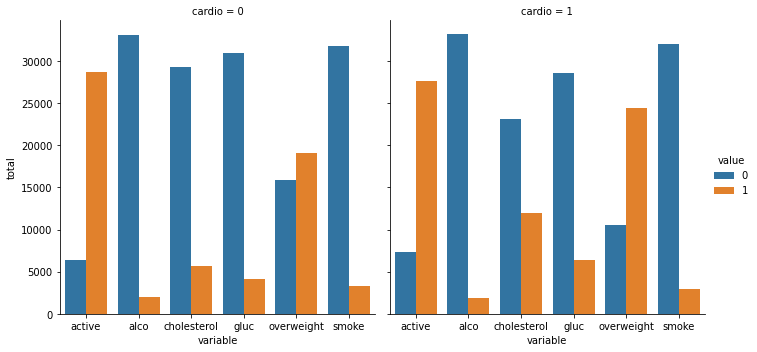

In [11]:
g = sns.catplot(x='variable', hue='value', col='cardio', kind='count', order=['active','alco', 'cholesterol', 'gluc', 'overweight', 'smoke'], data=df_to_plot)
g.set_ylabels('total')

* Data cleaning again. Drop rows where diastolic pressure is higher than systolic.

In [12]:
df[df.ap_lo > df.ap_hi]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
228,314,47,2,183,98.0,160,1100,0,1,1,0,1,1,1
241,334,60,2,157,60.0,160,1000,1,0,0,0,0,1,0
260,357,49,1,150,83.0,140,800,0,0,0,0,1,1,1
329,458,64,1,176,63.0,160,1000,1,1,0,0,0,1,0
345,482,51,1,154,81.0,140,1000,1,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69771,99659,63,1,167,81.0,160,1000,0,0,0,0,1,1,1
69872,99798,59,1,152,56.0,160,1000,0,0,0,0,1,1,0
69878,99807,58,2,168,95.0,160,1000,0,0,0,0,1,1,1
69885,99816,61,2,166,78.0,170,1000,0,0,0,0,0,0,1


In [13]:
df = df.apply(lambda x: x[df.ap_lo<=df.ap_hi])

* Drop values smaller than 2.5th percentile and higher than 97.5th percentile for height and weight.

In [14]:
q1h = df.height.quantile(0.025)
q4h = df.height.quantile(0.975)
q1w = df.weight.quantile(0.025)
q4w = df.weight.quantile(0.975)

In [15]:
df = df.apply(lambda x: x[df.height > q1h])
df = df.apply(lambda x: x[df.height < q4h])

In [16]:
df = df.apply(lambda x: x[df.weight > q1w])
df = df.apply(lambda x: x[df.weight < q4w])

* Define correlation and heatmap.

<AxesSubplot:>

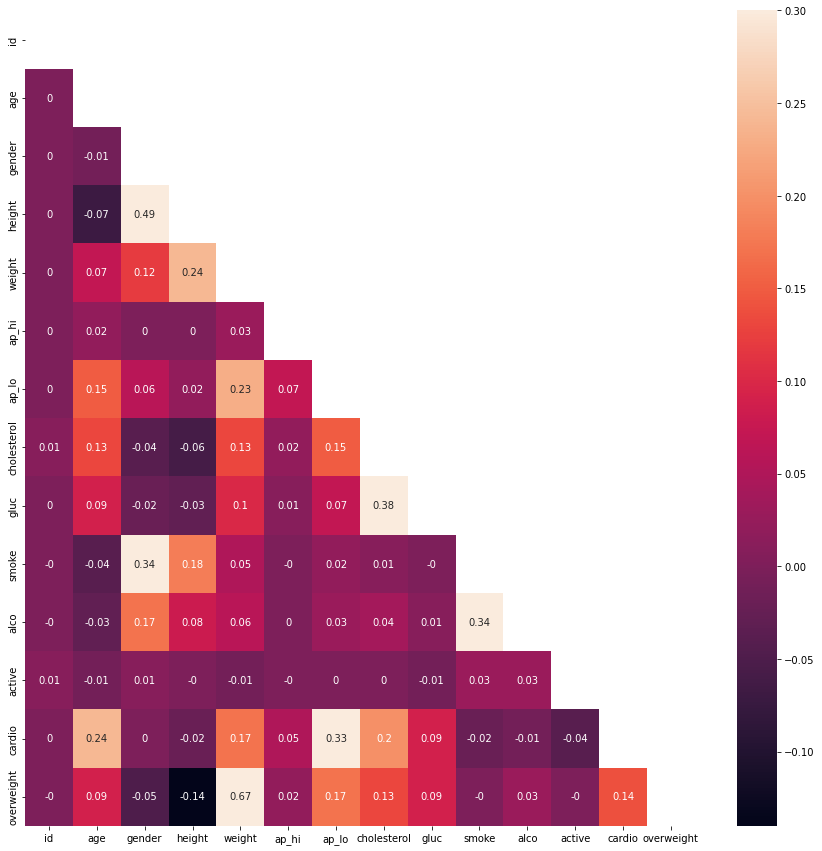

In [17]:
corr = df.corr().round(2)
mask = np.triu(np.ones_like(corr, dtype=bool))
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(data=corr, mask=mask, vmax=0.3, annot=True)

**Comment:** Looking at barplot, we can see a moderate increment of weight and cholesterol values in people with cardiovascular diseases. Also, people without cardiovascular diseases seem to perform more physical activity. All other values are quite similar. Looking at heatmap, we notice a moderate correlation between cardiac problems and Diastolic blood pressure.